In [5]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import os
import pandas as pd
from pandas import DataFrame

## plot function

In [35]:
def plot_bars (data,xtick_names,xlabel='x',ylabel='y',title='title',rotation=90):
    
    fig, ax = plt.subplots(figsize=[7,6])

    bar_width = 0.85
        
    opacity = 0.4
    
    index = np.arange(len(data))
    
    rects1 = ax.bar(index, data, 
                    alpha=opacity, color='b')
    
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    ax.set_xticks(index + bar_width / 2)
    ax.set_xticklabels(xtick_names)
    ax.tick_params(labelrotation=rotation)
    #ax.legend()
    ax.grid(True)
    
    
    fig.tight_layout()
    plt.show()
    fig_filename = title+".png"
    fig.savefig(path+fig_filename, dpi=200)

## load data file - must change to your own folder

In [44]:
# the datafile was generate from datasets from GISAH
#http://apps.who.int/gho/data/node.main.GISAH
#and analyzed using postgreSQL. See: create_aggregated_table.sql
path = "/Users/TAL/Downloads/challenge/alcohol research/row_cleaned_data/"
f = "alcohol_alc_dev_aggregate.csv"
df = pd.read_csv(path+f)

# Top 10 Countries in Wine Consumption per person

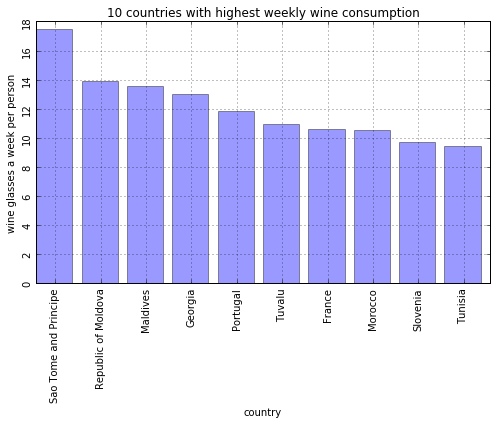

                   country      wine
131  Sao Tome and Principe  17.44350
62     Republic of Moldova  13.92360
43                Maldives  13.54080
17                 Georgia  12.98600
117               Portugal  11.80800
141                 Tuvalu  10.96865
57                  France  10.61340
134                Morocco  10.52710
123               Slovenia   9.68990
31                 Tunisia   9.45245


In [36]:
#wine consumption
key = 'wine'
df_10=df.sort_values(by=[key],ascending=False)[['country',key]].head(10)

plot_bars(df_10[key],df_10.country,
          xlabel = 'country', ylabel = 'wine glasses a week per person', title = '10 countries with highest weekly wine consumption')

print df_10

# Top 10 Countries in Beer Consumption per person

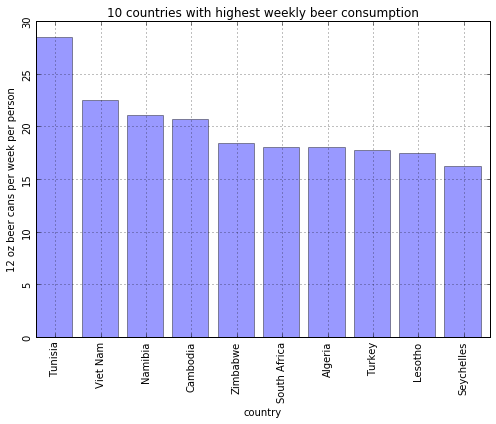

          country     beers
31        Tunisia  28.55510
184      Viet Nam  22.55475
172       Namibia  21.10010
20       Cambodia  20.70350
185      Zimbabwe  18.46320
124  South Africa  18.08800
78        Algeria  18.04950
138        Turkey  17.76960
164       Lesotho  17.50700
64     Seychelles  16.26040


In [45]:
#beer consumption
key = 'beers'
df_10=df.sort_values(by=[key],ascending=False)[['country',key]].head(10)

plot_bars(df_10[key],df_10.country,
          xlabel = 'country', ylabel = '12 oz beer cans per week per person', title = '10 countries with highest weekly beer consumption')
print df_10

# Top 10 Countries in Spirits Consumption per person

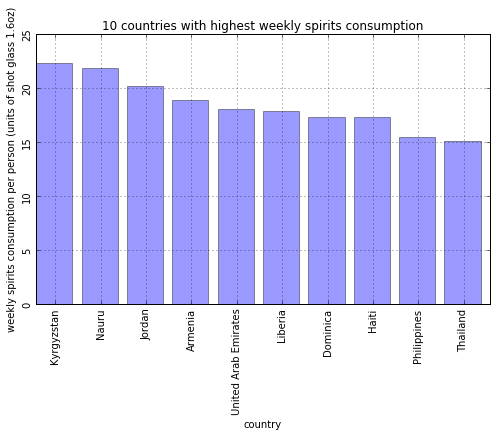

In [46]:
#spirits consumption
key = 'spirit'
df_10=df.sort_values(by=[key],ascending=False)[['country',key]].head(10)

plot_bars(df_10[key],df_10.country,
          xlabel = 'country', ylabel = 'weekly spirits consumption per person (units of shot glass 1.6oz)', title = '10 countries with highest weekly spirits consumption')

# Top 10 Countries in alcohol spending per person

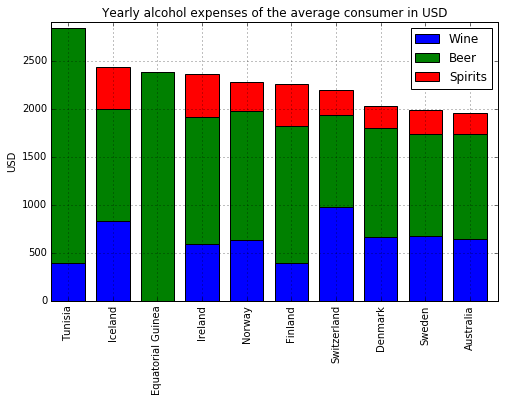

In [34]:
#10 countries that spend the most on alcoholic beverages
N=10
key1 = 'wine_expanse_year'
df_wine=df.sort_values(by=['year_total'],ascending=False)[['country',key1]].head(N)
df_wine=df_wine.fillna(0)
key2 = 'beer_expanse_year'
df_beer=df.sort_values(by=['year_total'],ascending=False)[['country',key2]].head(N)
df_beer=df_beer.fillna(0)
key3 = 'spirits_expanse_year'
df_spirits=df.sort_values(by=['year_total'],ascending=False)[['country',key3]].head(N)
df_spirits=df_spirits.fillna(0)



wine = df_wine[key1]
beer = df_beer[key2]
spirits = df_spirits[key3]
ind = np.arange(N)    # the x locations for the groups
width = 0.75       # the width of the bars: can also be len(x) sequence

fig=plt.figure(figsize=[8,5])
p1 = plt.bar(ind, wine, width)
p2 = plt.bar(ind, beer, width,
             bottom=wine)
p3 = plt.bar(ind, spirits, width,
             bottom=wine+beer)

plt.ylabel('USD')
plt.title('Yearly alcohol expenses of the average consumer in USD')
plt.xticks(ind+width / 2, df_wine.country,rotation=90)
plt.ylim([0,2900])
plt.legend((p1[0], p2[0], p3[0]), ('Wine', 'Beer', 'Spirits'))

plt.grid()
plt.show()
fig.tight_layout()
fig_filename = 'alcohol_expenses.png'
fig.savefig(path+fig_filename, dpi=200)

# Correlation between man to woman alc consumption ratio and divorce rate 

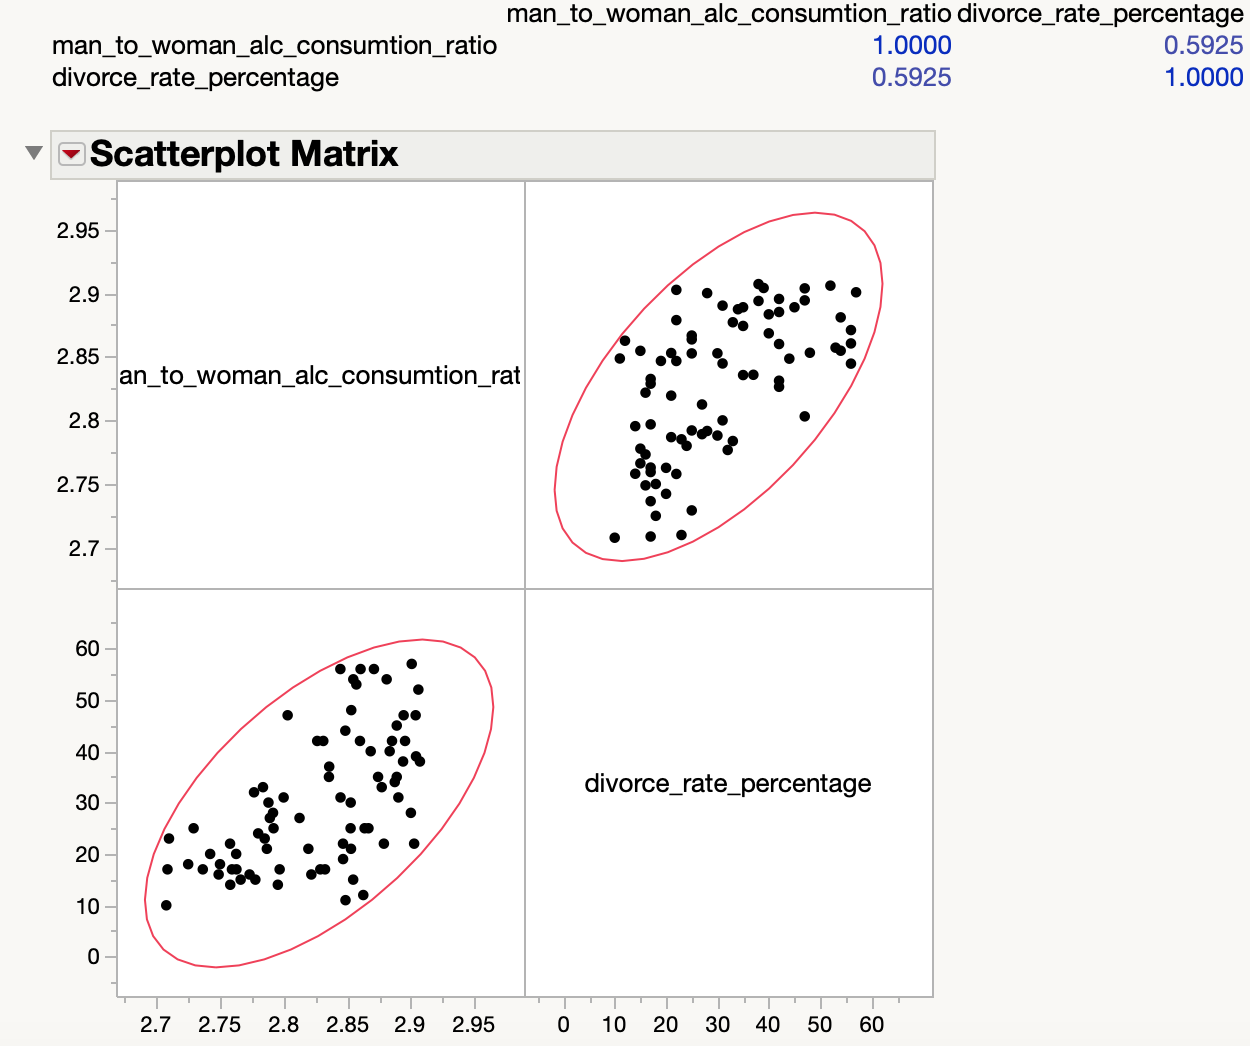

In [41]:
#this analysis was done last minute in JMP13
# there is 0.6 correlation coefficient between low ratio of man/woman alc consumption and low divorce rate
# man to woman consumption ratio is calculated as average_drinks_man/average_drinks_woman 
# divorce rate is calculated as num_divorces / num_marriages in 88 countries
# divorce rate data taken from wikipedia: https://en.wikipedia.org/wiki/Divorce_demography

f = 'jmp_analysis_divorce_rate.png'

from IPython.display import Image
Image(path+f)

